<a href="https://colab.research.google.com/github/MouryaPeddineni/machine_learning/blob/main/Multivariate_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import model_selection
from sklearn import linear_model

In [2]:
data = pd.read_csv('/content/drive/MyDrive/ML_datasets/50_Startups.csv')

In [3]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [4]:
data.shape

(50, 5)

In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

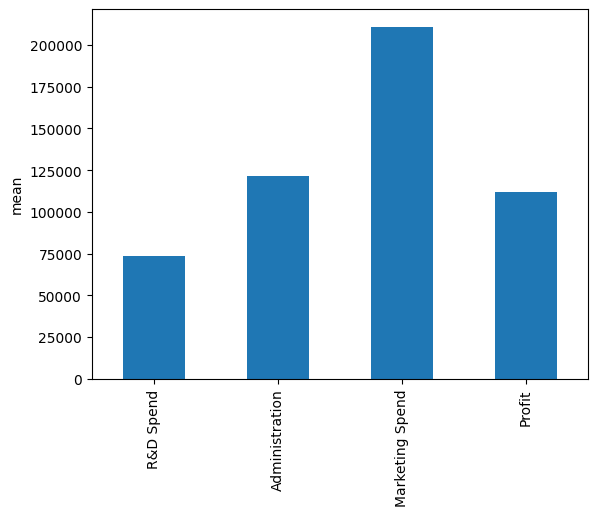

In [11]:
data.describe().loc['mean'].plot.bar()
plt.ylabel('mean')
plt.show()

In [12]:
correlation = data.corr()

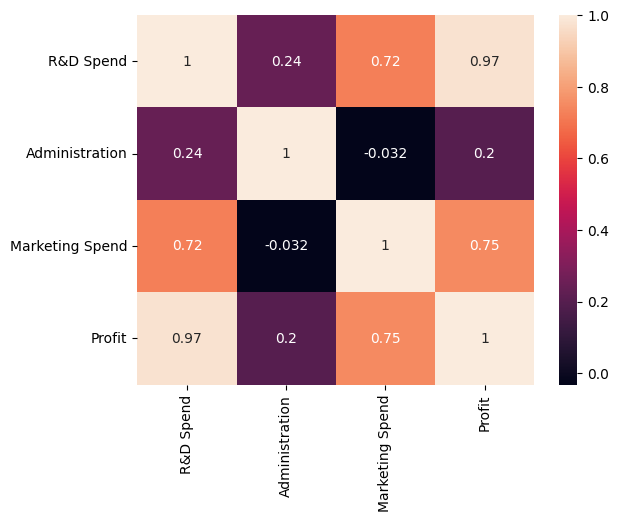

In [13]:
sn.heatmap(correlation,annot=True)
plt.show()

In [14]:
#profit,i.e.,label has highest correlation with R&D spend.
#but since it is multivariate regression every feature is considered.
x = data.iloc[:,:-2]
y = data.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [17]:
X_train.shape

(35, 3)

In [26]:
X_train.head()

,R&D Spend,Administration,Marketing Spend
7,130298.13,145530.06,323876.68
14,119943.24,156547.42,256512.92
45,1000.23,124153.04,1903.93
48,542.05,51743.15,0.00
29,65605.48,153032.06,107138.38


In [18]:
X_test.shape

(15, 3)

In [19]:
Y_train.shape

(35,)

In [20]:
Y_train = Y_train.values.reshape(-1,1)
Y_test = Y_test.values.reshape(-1,1)

In [21]:
Y_train.shape,Y_test.shape

((35, 1), (15, 1))

In [22]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [23]:
#Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
Y_pred1 = reg.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(Y_train, Y_pred1)}')
print(f'MSE = {mean_squared_error(Y_train, Y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(Y_train, Y_pred1))}')
print(f'R_2 = {r2_score(Y_train, Y_pred1)}')

Performance of the model on training data :

MAE = 6616.228670720838
MSE = 89657314.14918503
RMSE = 9468.754625038344
R_2 = 0.9515391457049143


In [24]:
#Evaluating the model on testing data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
Y_pred2 = reg.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(Y_test, Y_pred2)}')
print(f'MSE = {mean_squared_error(Y_test, Y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(Y_test, Y_pred2))}')
print(f'R_2 = {r2_score(Y_test, Y_pred2)}')

Performance of the model on test data :

MAE = 6489.66017048665
MSE = 62240269.84291527
RMSE = 7889.250271281503
R_2 = 0.9355188337118217


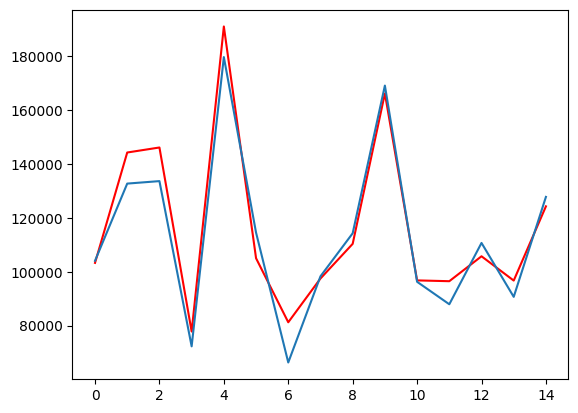

In [25]:
# plt.scatter(X_train,Y_train,color='blue')
plt.plot(Y_test,color='red')
plt.plot(Y_pred2)
plt.show()